# Demo w/ notes at the end

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Parameters

In [2]:
# There are three model inputs: vector parameters, scalar parameters, variables, and contact matrix
# Let's set/fetch these values.

# infection, death, and recovery rates use proxy values, i.e., age distribution of cases, mortality, and recovery, respectively
# average incubation period - in days 
# average infectious period - in days
# wearing mask - % of individuals wearing mask [0,1]
# wearing mask protection - % protection given by mask-wearing [0,1]
# physical distancing - % of individuals observing physical distance [0,1]
# physical distancing protection - % protection given by physical distancing [0,1]
# agent movement range - max number of tiles that an agent could traverse in a single step 

# Dummy data
scalar_parameters = {
    "average_incubation_period": 7,
    "average_infectious_period": 10,
    "wearing_mask": 0,
    "wearing_mask_protection": 0,
    "physical_distancing": 0,
    "physical_distancing_protection": 0,
    "agent_movement_range": 10
}

In [3]:
vector_parameters = pd.read_csv('input/vector_parameters.csv', index_col=0)
vector_parameters

,infection_rate,death_rate,recovery_rate
0 - 4,0.020366,0.000122,0.020237
5 - 9,0.023607,0.000020,0.023580
10 - 14,0.031332,0.000053,0.031274
15 - 19,0.044933,0.000091,0.044839
20 - 24,0.108715,0.000165,0.108558
25 - 29,0.144901,0.000335,0.144580
30 - 34,0.123232,0.000361,0.122882
35 - 39,0.094713,0.000521,0.094199
40 - 44,0.081052,0.000777,0.080279
45 - 49,0.068115,0.001003,0.067113


In [4]:
variables = pd.read_csv('input/variables.csv', index_col=0)
variables

,S,E,I,R,D,V
0 - 4,746,0,1,5,1,0
5 - 9,723,0,1,6,1,0
10 - 14,703,0,1,8,1,0
15 - 19,657,0,1,11,1,112
20 - 24,694,0,1,26,1,118
25 - 29,643,0,1,34,1,109
30 - 34,558,0,1,29,1,95
35 - 39,493,0,1,23,1,84
40 - 44,414,0,1,19,1,70
45 - 49,365,0,1,16,1,62


In [5]:
# Contact matrices 
# The contact matrices are already preprocessed.
# The files are located in input/contact_matrices/ directory.
# There are 5 options, all are in the context of school reopening. 
# 0% school reopening, 25%, 50%, 75%, and 100% 
# When opening the files, use pandas.read_csv and set parameter index_col=0 to use the first column as index

# For this demo, we use 100% school reopening.
contact_matrix = pd.read_csv('input/contact_matrices/contact_matrix_100_school.csv', index_col=0)
contact_matrix

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80+
0 - 4,0.193623,0.125056,0.070775,0.043298,0.064211,0.086886,0.087910,0.068301,0.041248,0.025820,0.026049,0.020912,0.012758,0.008166,0.004176,0.001729,0.001729
5 - 9,0.114183,0.709289,0.175379,0.052915,0.030226,0.066275,0.086435,0.079682,0.061014,0.030474,0.019554,0.016548,0.012686,0.007373,0.003488,0.001832,0.001832
10 - 14,0.048839,0.261417,0.923017,0.120500,0.051770,0.040519,0.055501,0.070908,0.069531,0.042331,0.022928,0.011428,0.006960,0.006221,0.004229,0.002384,0.002384
15 - 19,0.024983,0.064421,0.349323,1.000000,0.161970,0.075734,0.053305,0.068808,0.072074,0.061718,0.033041,0.014533,0.007207,0.003466,0.002004,0.000952,0.000952
20 - 24,0.039341,0.032570,0.046977,0.285583,0.335634,0.155770,0.091349,0.073998,0.063223,0.066285,0.045716,0.025025,0.009996,0.002522,0.002367,0.001408,0.001408
25 - 29,0.068650,0.039275,0.023685,0.085471,0.181958,0.212179,0.125610,0.091059,0.073899,0.060551,0.056541,0.029648,0.013665,0.003228,0.001192,0.000657,0.000657
30 - 34,0.064309,0.097271,0.073382,0.044934,0.082734,0.127845,0.153073,0.117501,0.086478,0.063983,0.049064,0.033677,0.016921,0.004307,0.002129,0.001100,0.001100
35 - 39,0.056249,0.095882,0.085721,0.062296,0.053379,0.089563,0.111476,0.141637,0.116836,0.072227,0.051415,0.027378,0.016711,0.007266,0.003667,0.001005,0.001005
40 - 44,0.035094,0.065338,0.083857,0.091363,0.064659,0.075320,0.096053,0.107361,0.125888,0.090878,0.062622,0.023187,0.013205,0.005469,0.003060,0.001419,0.001419
45 - 49,0.020530,0.046736,0.058029,0.109667,0.062353,0.062484,0.071129,0.080301,0.084677,0.086556,0.058786,0.027021,0.009440,0.002300,0.002646,0.002107,0.002107


# Model Run

In [6]:
from covid_model.model import Covid19Model

In [7]:
model = Covid19Model(vector_parameters, scalar_parameters, variables, contact_matrix)

In [8]:
# There are two model output: model.summary_time and summary_new_cases, both are pandas data frames
model.summary_time

,S,E,I,R,D,V
0,7015,0,17,239,17,825


In [9]:
model.summary_new_cases

,S,E,I,R,D,V
0 - 4,0,0,0,0,0,0
5 - 9,0,0,0,0,0,0
10 - 14,0,0,0,0,0,0
15 - 19,0,0,0,0,0,0
20 - 24,0,0,0,0,0,0
25 - 29,0,0,0,0,0,0
30 - 34,0,0,0,0,0,0
35 - 39,0,0,0,0,0,0
40 - 44,0,0,0,0,0,0
45 - 49,0,0,0,0,0,0


In [10]:
# Model run: 150 steps
for i in range(150):
    model.step()

In [11]:
model.summary_time

,S,E,I,R,D,V
0,7015.0,0.0,17.0,239.0,17.0,825.0
1,7015.0,0.0,17.0,239.0,17.0,825.0
2,7014.0,1.0,17.0,239.0,17.0,825.0
3,7014.0,1.0,17.0,239.0,17.0,825.0
4,7014.0,1.0,17.0,239.0,17.0,825.0
...,...,...,...,...,...,...
146,7007.0,1.0,1.0,262.0,17.0,825.0
147,7007.0,0.0,2.0,262.0,17.0,825.0
148,7007.0,0.0,2.0,262.0,17.0,825.0
149,7007.0,0.0,2.0,262.0,17.0,825.0


In [12]:
model.summary_new_cases

,S,E,I,R,D,V
0 - 4,0,0,0,1,0,0
5 - 9,0,2,2,2,0,0
10 - 14,0,0,0,1,0,0
15 - 19,0,0,0,1,0,0
20 - 24,0,0,0,1,0,0
25 - 29,0,1,1,2,0,0
30 - 34,0,1,1,2,0,0
35 - 39,0,3,3,4,0,0
40 - 44,0,1,1,2,0,0
45 - 49,0,0,0,1,0,0


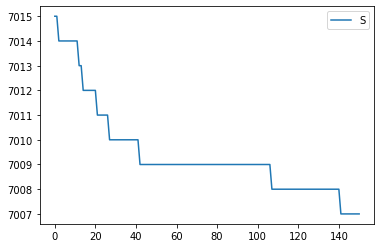

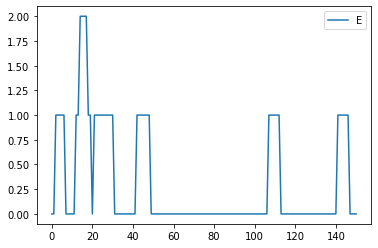

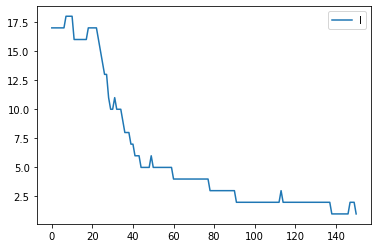

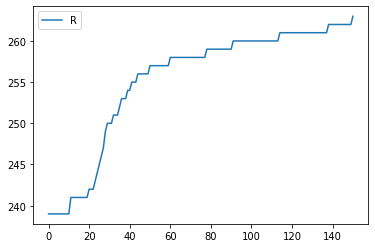

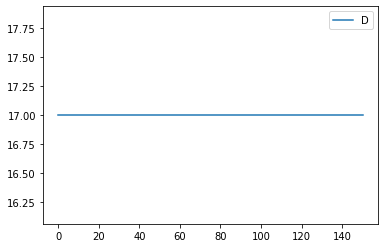

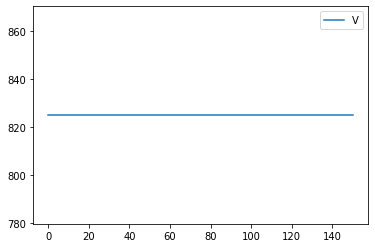

In [13]:
# Plotting the time series 
for state in model.summary_time.columns:
    plt.figure()
    model.summary_time[state].plot()
    plt.legend()

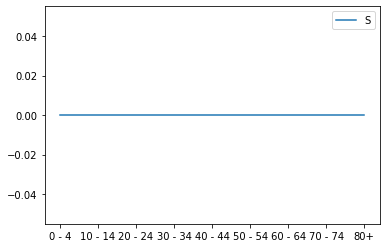

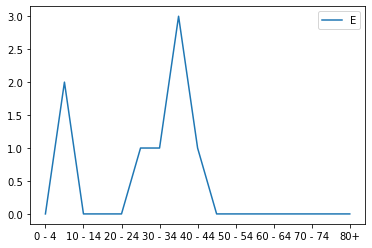

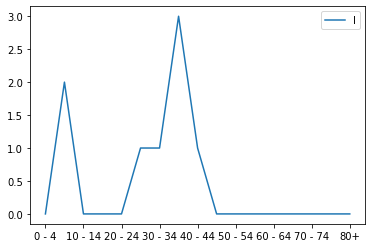

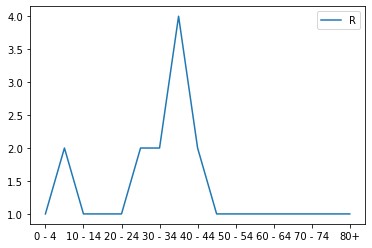

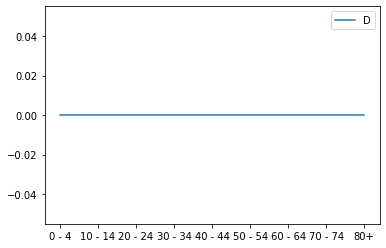

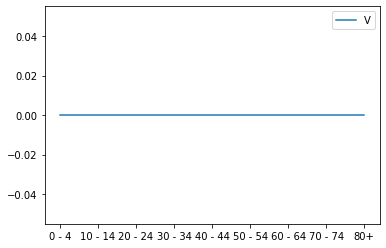

In [17]:
# Plotting the age-stratified SEIRDV data
for state in model.summary_new_cases.columns:
    plt.figure()
    model.summary_new_cases[state].plot()
    plt.legend()

## As you may have noticed, the results are not demonstrative of a COVID-19 scenario. Try to increase the number of agents, tweak the parameters, and run the model in Google Colab (if your machine cannot support the simulations).

## Also, run the model several times whenever you to simulate, then compute the average of the results. This being said, save your results as files. The "natural" way is to save as csv. Example below.

In [20]:
# saving
model.summary_time.to_csv("output/summary_time.csv")

In [21]:
# reading 
pd.read_csv("output/summary_time.csv", index_col=0)

,S,E,I,R,D,V
0,7015.0,0.0,17.0,239.0,17.0,825.0
1,7015.0,0.0,17.0,239.0,17.0,825.0
2,7014.0,1.0,17.0,239.0,17.0,825.0
3,7014.0,1.0,17.0,239.0,17.0,825.0
4,7014.0,1.0,17.0,239.0,17.0,825.0
...,...,...,...,...,...,...
146,7007.0,1.0,1.0,262.0,17.0,825.0
147,7007.0,0.0,2.0,262.0,17.0,825.0
148,7007.0,0.0,2.0,262.0,17.0,825.0
149,7007.0,0.0,2.0,262.0,17.0,825.0
